<a href="https://colab.research.google.com/github/SamDavis630/INFO5502-Summer2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [ ]:
### You code here:

import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

Upload Train and Test Files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_luc.csv to train_luc.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_luc.csv to test_luc.csv


Understanding basic stats of the data set

In [ ]:
# read the data and display the first 5 rows
train_data = pd.read_csv('train_luc.csv', header=0)

print("\nNumber of samples:",train_data.shape[0],"and number of features:",train_data.shape[1],"\n")

train_data.head()


Number of samples: 9174 and number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Exploratory statistics for each variable
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


Create a new feature

In [ ]:
# create hour column
def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
train_data['hour'] = train_data['datetime'].map(hour_of_day)
train_data.head()

# create day column
def day_datestamp(dt1):
    return datetime.strptime(dt1, "%Y-%m-%d %H:%M:%S").date().day
train_data['day'] = train_data['datetime'].map(day_datestamp)
train_data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


Make visualizations to better understand your data

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

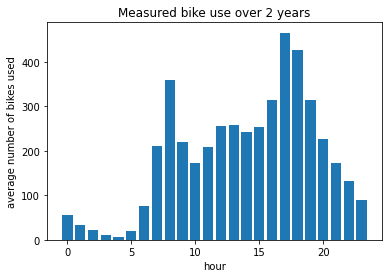

In [ ]:
hours = np.unique(train_data['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_data = train_data.loc[train_data['hour'] == h]
    hours_mean[h] = temp_data['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")



day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


Text(0.5, 1.0, 'Measured bike use over 2 years')

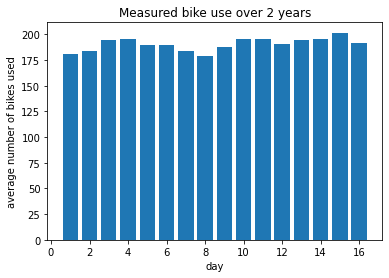

In [ ]:
day = np.unique(train_data['day'])
print("day:",day)

days_mean = {}
for d in day:
    temp_data = train_data.loc[train_data['day'] == d]
    days_mean[d] = temp_data['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(day,[days_mean[d] for d in day])
plt.xlabel("day")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

Pick the features and the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor



In [ ]:
# pick your features
cols = ['hour', 'day', 'weather']

model = LinearRegression()
print("columns selected for later:",cols)
print(model)

columns selected for later: ['hour', 'day', 'weather']
LinearRegression()


Separate your training and test sets

In [ ]:
# this is a way of splitting training and testing 

n = len(train_data) # get number of rows in the training set
training_size = 0.75 # fraction of training data to split off for internal testing

# set up separate training and testing sets

indices = np.array(range(n)) # makes an array of row indices in order
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]

# now use those shuffled indices to separating training from test dataframes
new_train_data = train_data.iloc[mytrain_i]
new_test_data = train_data.iloc[mytest_i]

print("samples in the new training subset:",len(new_train_data))
print("samples in the new test subset:",len(new_test_data))




samples in the new training subset: 6880
samples in the new test subset: 2294


Fit the mdoel to a portion of the training set, test on teh rest and evaluate

In [ ]:
# fit the model to the training subset of original training data
model.fit(new_train_data[cols], new_train_data['count'])

# predict on the testing subset of the original training data
pred_count = model.predict(new_test_data[cols])

# score the model on the new test set
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(new_test_data['count'],pred_count))
print("RMS error:",rms)

RMS error: 162.7399944783172


Creating the test file output

In [ ]:
# read in the test data
test_data = pd.read_csv('test_luc.csv', header=0)
print("\nNumber of samples:",test_data.shape[0] ,"and number of features:",test_data.shape[1],"\n")

# add that new feature into the test data to use it in prediction
test_data['hour'] = test_data['datetime'].map(hour_of_day)
test_data['day'] = test_data['datetime'].map(hour_of_day)

# show the test data output to be sure it read in correctly and added the column
test_data.head()

# fit the selected model TO YOUR FULL TRAINING SET
model.fit( train_data[cols], train_data['count'])

# apply to the test data 
pred_count = model.predict(test_data[cols])

# add the prediction column 
test_data['count'] = pred_count

# save the predicted count as a csv with a header column
test_data = test_data[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")


Number of samples: 1712 and number of features: 9 

Prediction complete. Saved as my_prediction.csv


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [243]:
### You code here:

import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [244]:
#upload the data_set
from google.colab import files
uploaded = files.upload()

Saving portfolio_data.csv to portfolio_data (1).csv


In [245]:
# read the data and display the first 5 rows
stdata = pd.read_csv('portfolio_data.csv', header=0)

print("\nNumber of samples:",stdata.shape[0],"and number of features:", stdata.shape[1],"\n")

stdata.head()




Number of samples: 1520 and number of features: 5 



,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [246]:
#Statistics for each variable
stdata.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


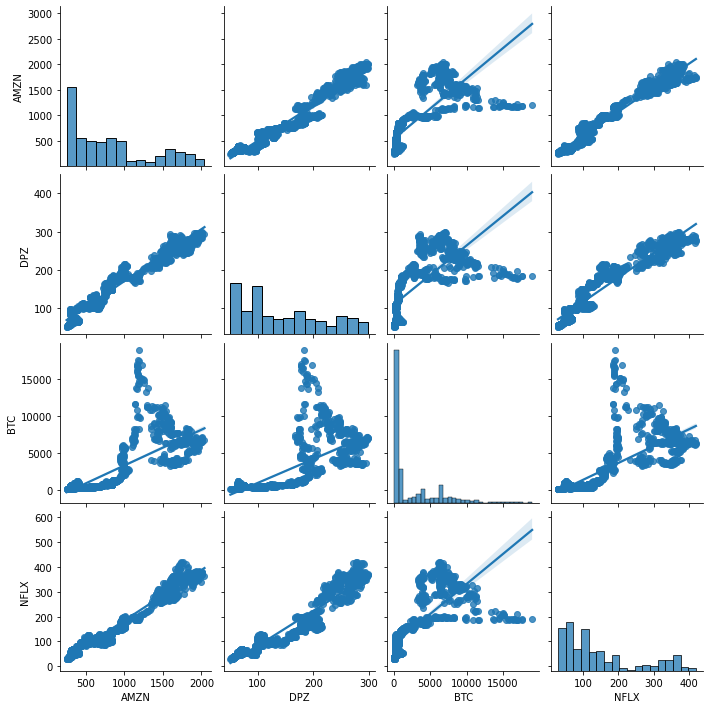

In [247]:
sns.pairplot(stdata, kind='reg')

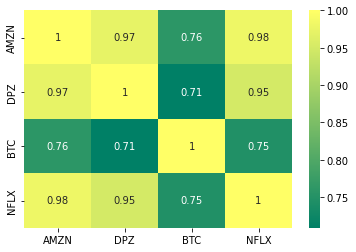

In [248]:
sns.heatmap(stdata.corr(), annot=True, cmap='summer')

In [249]:
len(stdata)

1520

In [250]:
# Create a new dataframe with only the 'Close column 
data = stdata.filter(['AMZN'])
# Convert the dataframe to a numpy array
dataset = data.values

train = dataset[:1444]
test = dataset[1444:]

In [251]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [252]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [253]:
scaled_train[:10]

array([[0.        ],
       [0.00241169],
       [0.00548211],
       [0.00418137],
       [0.00530348],
       [0.00583382],
       [0.00666005],
       [0.00859721],
       [0.00908848],
       [0.01122102]])

In [254]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [255]:
#define generator
n_input = 76
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [256]:
x,y = generator[0]
print(f'given the array: \n{x.flatten()}')
print(f'predict this y: \n {y}')

given the array: 
[0.         0.00241169 0.00548211 0.00418137 0.00530348 0.00583382
 0.00666005 0.00859721 0.00908848 0.01122102 0.01023291 0.00887075
 0.01209749 0.01083025 0.0115169  0.00822317 0.00757558 0.00754209
 0.01064044 0.0096579  0.01038363 0.01170672 0.01041155 0.00975281
 0.01057345 0.01094189 0.01598857 0.01833326 0.0148218  0.01308562
 0.01538565 0.01438077 0.0166529  0.01871847 0.01670873 0.01407374
 0.01402907 0.01249385 0.01332008 0.01637935 0.01636818 0.01644634
 0.01890827 0.01981824 0.01998571 0.02101849 0.02364789 0.02417266
 0.02461926 0.02871132 0.03311598 0.0325689  0.03273637 0.0337524
 0.03119556 0.03182083 0.03084387 0.02949288 0.02830937 0.0307992
 0.03560583 0.03230651 0.03024653 0.0295822  0.03201064 0.03125139
 0.02945379 0.02931982 0.0271761  0.02652293 0.0273715  0.02705328
 0.02553482 0.02406659 0.02134787 0.02042674]
predict this y: 
 [[0.02084543]]


In [257]:
x.shape

(1, 76, 1)

In [258]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape= (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [259]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [218]:
#fit mdoel
model.fit(generator,epochs=1)

1368/1368 [==============================] - 32s 23ms/step - loss: 0.0018


In [274]:
last_train_batch = scaled_train[-76:]

In [275]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [276]:
model.predict(last_train_batch)

array([[0.016345]], dtype=float32)

In [277]:
scaled_test[0]

array([0.79403552])

In [280]:
test_predictions = []

first_batch = scaled_train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch= np.append(current_batch[:,1:,:],[[current_pred]], axis=1)




In [271]:
test_predictions

[array([0.016345], dtype=float32),
 array([0.01020621], dtype=float32),
 array([0.00781816], dtype=float32),
 array([0.00631471], dtype=float32),
 array([0.00534023], dtype=float32),
 array([0.0046536], dtype=float32),
 array([0.00409936], dtype=float32),
 array([0.00363758], dtype=float32),
 array([0.00322962], dtype=float32),
 array([0.00287883], dtype=float32),
 array([0.00257923], dtype=float32),
 array([0.00231334], dtype=float32),
 array([0.00207244], dtype=float32),
 array([0.00185154], dtype=float32),
 array([0.00164966], dtype=float32),
 array([0.00146366], dtype=float32),
 array([0.00129251], dtype=float32),
 array([0.0011357], dtype=float32),
 array([0.00099286], dtype=float32),
 array([0.00086336], dtype=float32),
 array([0.00074664], dtype=float32),
 array([0.00064238], dtype=float32),
 array([0.00055009], dtype=float32),
 array([0.0004689], dtype=float32),
 array([0.00039796], dtype=float32),
 array([0.00033641], dtype=float32),
 array([0.00028335], dtype=float32),
 array

In [282]:
#model predicted price values
true_predictions = scaler.inverse_transform(test_predictions)

In [281]:
rmse = np.sqrt(np.mean(((predictions - test) ** 2)))
rmse

1760.5740930189238